In [ ]:
import nltk
import string
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
import re
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords

In [4]:
file = open(r"/content/drive/MyDrive/jungle.txt",encoding='utf-8')

In [6]:
#Remove \n occurence
wordslist = file.read().splitlines() 
T2 = ""
T2 = T2.join(wordslist)
T2[:500]

'Mowgli’s Brothers     Now Rann the Kite brings home the night        That Mang the Bat sets free--     The herds are shut in byre and hut        For loosed till dawn are we.     This is the hour of pride and power,        Talon and tush and claw.     Oh, hear the call!--Good hunting all        That keep the Jungle Law!     Night-Song in the JungleIt was seven o’clock of a very warm evening in the Seeonee hills whenFather Wolf woke up from his day’s rest, scratched himself, yawned, andspread out '

In [7]:
#Creating a string which has all the punctuations to be removed
punctuations = '''!()-[]{};:'"\,<>./‘’?“”@#$%^&*_~'''
text = ""
for char in T2:
    if char not in punctuations:
        text += char
T2=text
T2[:500]

'Mowglis Brothers     Now Rann the Kite brings home the night        That Mang the Bat sets free     The herds are shut in byre and hut        For loosed till dawn are we     This is the hour of pride and power        Talon and tush and claw     Oh hear the callGood hunting all        That keep the Jungle Law     NightSong in the JungleIt was seven oclock of a very warm evening in the Seeonee hills whenFather Wolf woke up from his days rest scratched himself yawned andspread out his paws one afte'

In [8]:
#Converting the text into lower case       
T2 = T2.lower()
T2[:500]

'mowglis brothers     now rann the kite brings home the night        that mang the bat sets free     the herds are shut in byre and hut        for loosed till dawn are we     this is the hour of pride and power        talon and tush and claw     oh hear the callgood hunting all        that keep the jungle law     nightsong in the jungleit was seven oclock of a very warm evening in the seeonee hills whenfather wolf woke up from his days rest scratched himself yawned andspread out his paws one afte'

In [9]:
#Remove numbers
T2 = re.sub(r'\d+','',T2)
T2[:500]

'mowglis brothers     now rann the kite brings home the night        that mang the bat sets free     the herds are shut in byre and hut        for loosed till dawn are we     this is the hour of pride and power        talon and tush and claw     oh hear the callgood hunting all        that keep the jungle law     nightsong in the jungleit was seven oclock of a very warm evening in the seeonee hills whenfather wolf woke up from his days rest scratched himself yawned andspread out his paws one afte'

In [ ]:
#Remove whitespace from text
def remove_whitespace(text):
    return  " ".join(text.split())
remove_whitespace(T2)

In [11]:
lemmatizer = WordNetLemmatizer()
# lemmatize string
def lemmatize_word(text):
    word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]
    return lemmas
lemmatize_word(T2)
T2[:500]

'mowglis brothers     now rann the kite brings home the night        that mang the bat sets free     the herds are shut in byre and hut        for loosed till dawn are we     this is the hour of pride and power        talon and tush and claw     oh hear the callgood hunting all        that keep the jungle law     nightsong in the jungleit was seven oclock of a very warm evening in the seeonee hills whenfather wolf woke up from his days rest scratched himself yawned andspread out his paws one afte'

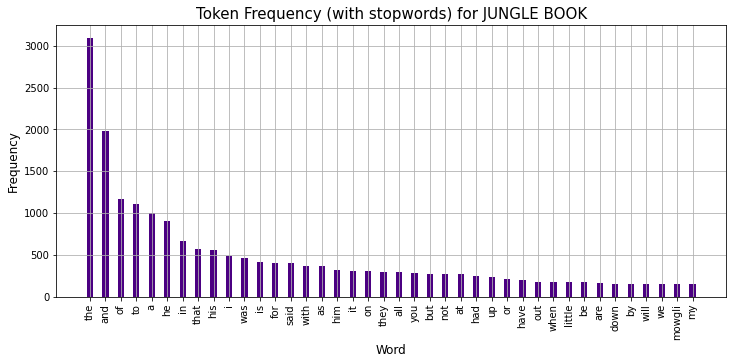

In [12]:
#Frequency distribution of tokens(with stopwords)
tokens = word_tokenize(T2)
freq = nltk.FreqDist(tokens)
freq = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1],reverse=True)}
x = list(freq.keys())[:40]
y = list(freq.values())[:40]
plt.figure(figsize=(12,5))
plt.bar(x,y,color ='indigo',width = 0.4)
plt.grid()
plt.xticks(rotation=90)
plt.title('Token Frequency (with stopwords) for JUNGLE BOOK',size=15)
plt.xlabel('Word',size=12)
plt.ylabel('Frequency',size=12)
plt.show()

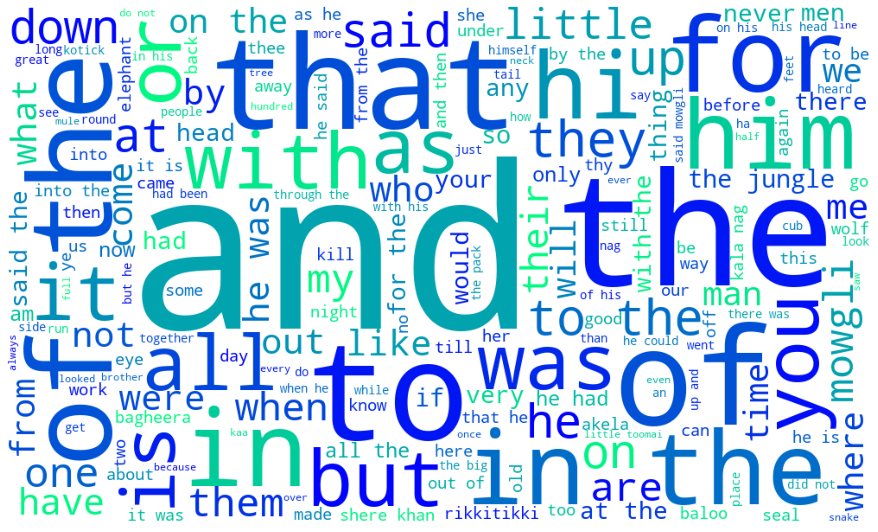

In [13]:
#Wordcloud (with stopwords)
wordcloud = WordCloud(width = 1000, height = 600, background_color ='white', min_font_size = 5,stopwords = {},colormap='winter').generate(T2) 
plt.figure(figsize = (12,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [14]:
#Removing stopwords
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(T2)
tokens_final = [i for i in tokens if not i in stop_words] # tokenising with removing stopwords
text = " "
text = text.join(tokens_final)
T2=text
T2[:500]

'mowglis brothers rann kite brings home night mang bat sets free herds shut byre hut loosed till dawn hour pride power talon tush claw oh hear callgood hunting keep jungle law nightsong jungleit seven oclock warm evening seeonee hills whenfather wolf woke days rest scratched yawned andspread paws one get rid sleepy feelingin tips mother wolf lay big gray nose dropped across herfour tumbling squealing cubs moon shone mouth thecave lived augrh said father wolf time tohunt going spring hill little s'

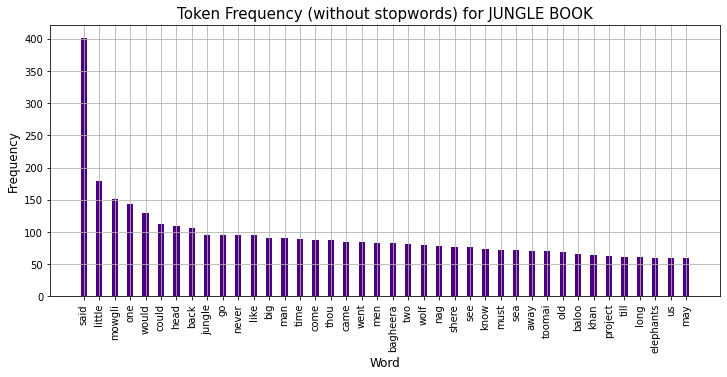

In [15]:
#Frequency distribution of tokens(without stopwords)
tokens = word_tokenize(T2)
freq = nltk.FreqDist(tokens)
freq = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1],reverse=True)}
x = list(freq.keys())[:40]
y = list(freq.values())[:40]
plt.figure(figsize=(12,5))
plt.bar(x,y,color ='indigo',width = 0.4)
plt.grid()
plt.xticks(rotation=90)
plt.title('Token Frequency (without stopwords) for JUNGLE BOOK',size=15)
plt.xlabel('Word',size=12)
plt.ylabel('Frequency',size=12)
plt.show()

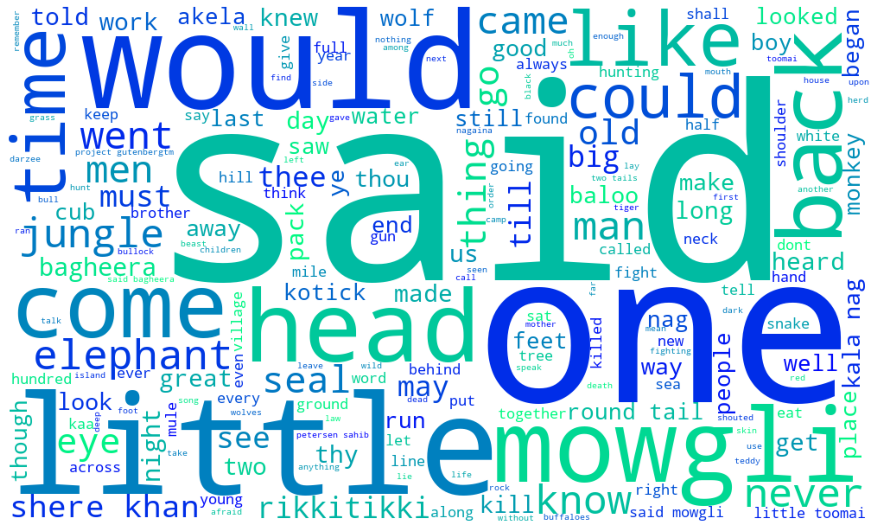

In [16]:
#Word cloud after removing stopwords
wordcloud = WordCloud(width = 1000, height = 600, 
                background_color ='white', 
                min_font_size = 5,stopwords = {},colormap='winter').generate(T2) 

plt.figure(figsize = (12,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

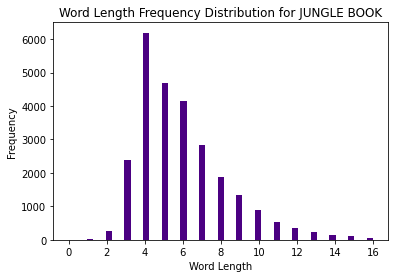

In [17]:
bin_size=np.linspace(0,16)
wordLength = [len(r) for r in tokens]

#Plotting histogram of Word length vs Frequency
plt.hist(wordLength, bins=bin_size,color='indigo')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Word Length Frequency Distribution for JUNGLE BOOK')
plt.show()

In [21]:
#POS tags
tagged = nltk.pos_tag(tokens) 
tagged[:10] 

[('mowglis', 'NN'),
 ('brothers', 'NNS'),
 ('rann', 'VBP'),
 ('kite', 'JJ'),
 ('brings', 'NNS'),
 ('home', 'NN'),
 ('night', 'NN'),
 ('mang', 'NN'),
 ('bat', 'NN'),
 ('sets', 'NNS')]

In [19]:
counts = Counter( tag for word,  tag in tagged)
print(counts)

Counter({'NN': 8481, 'JJ': 4718, 'NNS': 2722, 'VBD': 2304, 'RB': 1818, 'VBP': 1319, 'VBG': 983, 'VB': 917, 'VBN': 784, 'IN': 578, 'MD': 436, 'VBZ': 338, 'CD': 326, 'JJS': 97, 'PRP': 74, 'JJR': 71, 'DT': 66, 'RP': 48, 'WP': 46, 'RBR': 32, 'FW': 24, 'NNP': 20, 'CC': 12, 'WRB': 7, 'WP$': 5, 'PRP$': 4, 'EX': 4, 'WDT': 4, 'RBS': 3, 'PDT': 1, 'UH': 1})


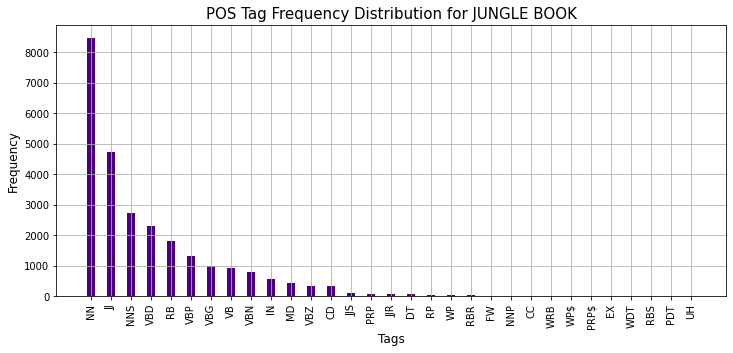

In [20]:
freq_tags = nltk.FreqDist(counts)
freq_tags = {k: v for k, v in sorted(freq_tags.items(), key=lambda item: item[1],reverse=True)}
x = list(freq_tags.keys())[:40]
y = list(freq_tags.values())[:40]
plt.figure(figsize=(12,5))
plt.bar(x,y,color ='indigo',width = 0.4)
plt.grid()
plt.xticks(rotation=90)
plt.title('POS Tag Frequency Distribution for JUNGLE BOOK',size=15)
plt.xlabel('Tags',size=12)
plt.ylabel('Frequency',size=12)
plt.show()